# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
tf.keras.__version__

'2.4.0'

## Prepara Dataset
In this block, you will prepare the data for the training, such as normalisation. 

In [4]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

def data():
    # load data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # create validation data
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
    
    # normalize
    x_train =  x_train/255.0
    x_val = x_val/255.0
    x_test = x_test/255.0
    
    # Converts a class vector (integers) to one-hot encoding matrix.
    y_train = keras.utils.to_categorical(y_train, num_classes=10)
    y_val = keras.utils.to_categorical(y_val, num_classes=10)
    y_test = keras.utils.to_categorical(y_test, num_classes=10)
    
    return x_train, y_train, x_val, y_val, x_test, y_test

## Build and train the model

Build and train your model. Finetuning with Hyperas Library

In [5]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

def create_model(x_train, y_train, x_val, y_val):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    model.add(keras.layers.Dense({{choice([256, 512])}}, kernel_initializer="he_normal"))
    model.add(keras.layers.Activation({{choice(['relu', 'selu', 'elu'])}}))
    model.add(keras.layers.Dropout({{uniform(0, 1)}}))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense({{choice([32, 64, 128])}}, kernel_initializer="he_normal"))
    model.add(keras.layers.Activation({{choice(['relu', 'selu', 'elu'])}}))
    model.add(keras.layers.Dropout({{uniform(0, 1)}}))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    adam = keras.optimizers.Adam(lr={{choice([1e-4, 1e-3, 1e-2, 1e-1])}})
    rmsprop = keras.optimizers.RMSprop(lr={{choice([1e-4, 1e-3, 1e-2, 1e-1])}})
    sgd = keras.optimizers.SGD(lr={{choice([1e-4, 1e-3, 1e-2, 1e-1])}})

    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optimizer = adam
    elif choiceval == 'rmsprop':
        optimizer = rmsprop
    else:
        optimizer = sgd

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
                  optimizer=optimizer)
    
    

    result = model.fit(x_train, y_train,
              batch_size={{choice([32, 64, 128, 256])}},
              epochs={{choice([2, 5, 10, 20, 30, 40])}},
              verbose=2,
              validation_data=(x_val,y_val))
    
    validation_acc = np.amax(result.history['val_accuracy'])
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 
    'model': model,  'history.val_loss':result.history['val_loss'], 'history.val_acc': result.history['val_accuracy'],
    'history.loss': result.history['loss'], 'history.acc': result.history['accuracy']}


In [6]:
trials = Trials()
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=10,
                                          trials=trials,
                                          notebook_name='SkeletonANN')

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'Dense': hp.choice('Dense', [256, 512]),
        'Activation': hp.choice('Activation', ['relu', 'selu', 'elu']),
        'Dropout': hp.uniform('Dropout', 0, 1),
        'Dense_1': hp.choice('Dense_1', [32, 64, 128]),
        'Activation_1': hp.choice('Activation_1', ['relu', 'selu', 'elu']),
        'Dropo

In [7]:
_, _, _, _, X_test, Y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:
313/313 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9832
[0.0726236030459404, 0.9832000136375427]
Best performing model chosen hyper-parameters:
{'Activation': 2, 'Activation_1': 0, 'Dense': 1, 'Dense_1': 2, 'Dropout': 0.1904090881738011, 'Dropout_1': 0.08063845654367285, 'batch_size': 1, 'choiceval': 0, 'epochs': 3, 'lr': 2, 'lr_1': 3, 'lr_2': 2}


In [8]:
# show the structure of your model
best_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_11 (Activation)   (None, 128)              

In [9]:
res = trials.best_trial['result']
del res['loss']

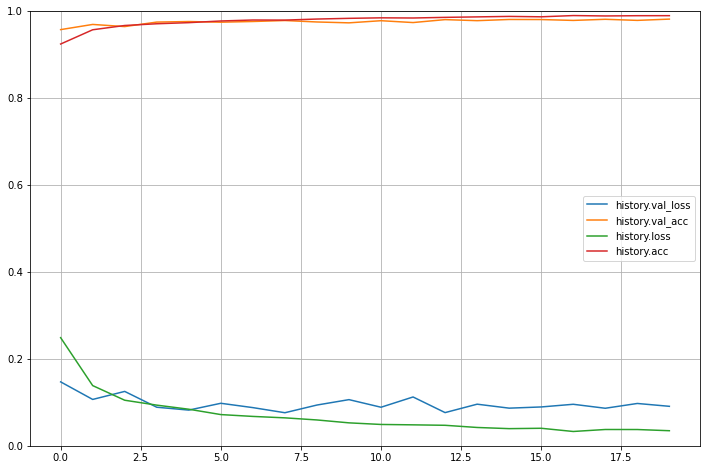

In [10]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(res).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [11]:
best_model.save('mnist.h5') 

## Load the model and evaluate it on the test data

In [12]:
model = keras.models.load_model("mnist.h5")
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9832


[0.0726236030459404, 0.9832000136375427]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

In order to built our Model we initially had to split the data into training and test data which was in line with our previous excercises and in line with the suggested preparation per the presentaions of Haozhe for practical 3.

As a second step we built the skeleton for the Neural Network which should classify the pictures and a list of options which we can give an optimization program to optimize the model. The main challenges we encountered there were the following
-	Choosing an appropriate amount of layers
-	Choosing an appropriate amount of neurons
-	Chosing an appropriate activation function per a certain layer
-	Choosing the right optimization method.
-	Choosing the right validation method
In order to optimize our model we therefore picked Hyperas to assess the best option amongst a list of options which we picked as we knew them from the Lecture or via internet research. To do so we would use the Hyperas Library. 
By using Hyperas a specific space can be explored much better. As such we had first to pick a list of options and then run the options through the optimization program which we wrote. In order to solve these problems we performed the following:

-	Layers: (.Dense) As a first step RandomCV has been used to define the amount of hidden layers. It turned out that by using 3 hidden layers the validation error started to increase which indicates overfitting. Therefore we eventually picked 2 layers

-	Neurons (.Dense({Choice()}): To decide the amount of Neurons we want to try out with hyperas, we tried a couple of different sizes, where we started with a range of about 1024 Neurons for the first layer and a bit of a lower size for the second layer. This did initially not provide good performances. After some tries we figured out that an amount between 256 and 512 may perform the best for the first layer and 32, 64 and 128 for the second layer. From our own research of literature we ntoed that the number of neurons to be tried should be binary numbers (due to the binary hardware architecture this gives the best results).

-	Activation Function: we used the most common ones “relu”, “selu” and “elu” which provided us with the bet result.

-	Choosing the right Optimization Option: We tried out Gradient Decent initially but figured out that it took too much time to calculate, while eventually BatchNormalization provided a good performance improvement vs. time relationship

-	Choosing the right validation method: We decided to choose between adam, sgd and rmsprop as we have read in the literature that these opimizers are state of the art

After trying out several of the above options the result was the model which we put onto Github, where we run the Hyperas code and picked the model architecture which had the highest performance accuracy. Thereby we reached an accuracy of 98%. The output also shows the different parameters of the model, by providing the index of a certain option type (e.g. activation: 2 means the third element of the provided optimization options which is in our case “elu”)
